In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [4]:
## copy paste these
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

# I. Content

# 1. Gathering Data

In [75]:
screen_name='mindbodygreen' #user name
count=200    #max=200
page=0       #page 0 represent most recent tweets
tweets=api.user_timeline(screen_name=screen_name,count=count,page=0)

In [76]:
# scraping pages from 0 to 29
pages = np.arange(30)

txts = []
for page in pages: 
    tweets = api.user_timeline(screen_name=screen_name, count=count, page=page)
    for tweet in tweets: 
        txts.append(json.loads(json.dumps(tweet._json)))

len(txts)

3414

In [77]:
txts[3413]

{'created_at': 'Wed Nov 27 22:01:01 +0000 2019',
 'id': 1199810385127313408,
 'id_str': '1199810385127313408',
 'text': 'Your favorite, kid-approved side dish just got a low-carb makeover. 😋 https://t.co/qgMk7pxFSV',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/qgMk7pxFSV',
    'expanded_url': 'http://ow.ly/xfys30pVyHW',
    'display_url': 'ow.ly/xfys30pVyHW',
    'indices': [70, 93]}]},
 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 17781673,
  'id_str': '17781673',
  'name': 'mindbodygreen',
  'screen_name': 'mindbodygreen',
  'location': 'Brooklyn, NY',
  'description': 'connecting soul & science. 💫',
  'url': 'http://t.co/xQ41BHxbiB',
  'entities': {'url': {'urls': [{'url': 'http://t.co/xQ

In [78]:
#get values lists
time = []
twtid = []
text = []
favorite_count = []
retweet_count=[]
hashtags=[]
url=[]

favorite_count=[]
for line in txts:
    time.append(line['created_at'])
    twtid.append(line['id'])
    text.append(line['text'])
    favorite_count.append(line['favorite_count'])
    retweet_count.append(line['retweet_count'])
    hashtags.append(line['entities']['hashtags'])
    url.append(line['entities']['urls'])

In [79]:
pip install preprocessing

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [81]:
# remove urls and hashtags in text
#!pip install tweet-preprocessor 

import preprocessor as p
p.clean(text[1])

# remove hushtags and urls in all descriptions
text_clean = []
for line in text:
    text_clean.append(p.clean(line))
text_clean[:1]

['We reached out to registered dietitians who explain the health benefits and side effects, plus how to get more in a']

# 2. Assessing Data

In [82]:
# create data frame
df = pd.DataFrame(list(zip(time, twtid, text_clean, favorite_count, retweet_count, hashtags, url)),
                             columns=['created_at', 'tweet_id','text_clean','favorite_count','retweet_count',
                                     'hashtags','url'])
df

,created_at,tweet_id,text_clean,favorite_count,retweet_count,hashtags,url
0,Fri Jul 31 19:01:44 +0000 2020,1289275069370310656,We reached out to registered dietitians who ex...,2,1,[],"[{'url': 'https://t.co/nyAEuWKwWN', 'expanded_..."
1,Fri Jul 31 17:03:42 +0000 2020,1289245366081093632,Happy . Here's how we're celebrating:,9,4,"[{'text': 'NationalAvocadoDay', 'indices': [6,...","[{'url': 'https://t.co/gE60WESbnB', 'expanded_..."
2,Fri Jul 31 15:03:04 +0000 2020,1289215003954831360,Before figuring out how your own body reacts t...,8,3,[],"[{'url': 'https://t.co/ixbJop7ZvT', 'expanded_..."
3,Fri Jul 31 14:03:14 +0000 2020,1289199948404101120,"We caught up with functional medicine leaders,...",9,3,[],"[{'url': 'https://t.co/atohj6rQy9', 'expanded_..."
4,Fri Jul 31 13:02:53 +0000 2020,1289184761349459969,To acknowledge the beginning of harvest season...,11,3,[],"[{'url': 'https://t.co/jceakbNXM7', 'expanded_..."
...,...,...,...,...,...,...,...
3409,Thu Nov 28 06:00:19 +0000 2019,1199931001599860736,"""I fell in love with the texture at first use,...",8,2,[],"[{'url': 'https://t.co/NhvEuTumKX', 'expanded_..."
3410,Thu Nov 28 04:00:10 +0000 2019,1199900768125562880,The common ways your shadow may be sabotaging ...,2,0,[],"[{'url': 'https://t.co/z7FxuXG1nX', 'expanded_..."
3411,Thu Nov 28 02:00:35 +0000 2019,1199870672077500416,Our love affair with all things tech is taking...,13,11,[],"[{'url': 'https://t.co/4nJUUbjAbm', 'expanded_..."
3412,Thu Nov 28 00:00:54 +0000 2019,1199840553552232450,Here are both preventive strategies this exper...,15,7,[],"[{'url': 'https://t.co/c97nBD2MeC', 'expanded_..."


In [83]:
df['text_clean'].value_counts()

Avoid these to make finding your partner way more pleasantand more likely!                                             4
They might sound similar, but they actually have different symptoms and require totally different treatments.          4
When feels a cold coming on, he reaches for the varieties that will fight off the illness completely (o                4
We've been wondering: Are collagen powder and protein powder interchangeable?                                          4
No. : "Boundaries aren't meant to keep people out; they're meant to make it easier for people to get close."           4
                                                                                                                      ..
While crystals won't do all the work for us, theyre an accessible tool for harnessing good energies + reminding us     1
Just as almonds provide nutrition and health benefits to our diets, they are full of health benefits for our strand    1
There's more to tending to your 

In [16]:
df.describe()

,tweet_id,favorite_count,retweet_count
count,3.413000e+03,3413.000000,3413.000000
mean,1.246019e+18,10.918840,3.947260
std,2.685540e+16,8.122424,3.348921
min,1.199810e+18,0.000000,0.000000
25%,1.222701e+18,5.000000,2.000000
50%,1.245728e+18,9.000000,3.000000
75%,1.269676e+18,14.000000,5.000000
max,1.289245e+18,73.000000,28.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 7 columns):
created_at        3414 non-null object
tweet_id          3414 non-null int64
text_clean        3414 non-null object
favorite_count    3414 non-null int64
retweet_count     3414 non-null int64
hashtags          3414 non-null object
url               3414 non-null object
dtypes: int64(3), object(4)
memory usage: 186.8+ KB


# 3. Clean & Store Data

In [85]:
#copy data
clean_df= df.copy()

In [86]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 7 columns):
created_at        3414 non-null object
tweet_id          3414 non-null int64
text_clean        3414 non-null object
favorite_count    3414 non-null int64
retweet_count     3414 non-null int64
hashtags          3414 non-null object
url               3414 non-null object
dtypes: int64(3), object(4)
memory usage: 186.8+ KB


CLEAN HASHTAGS

In [87]:
clean_df['hashtags'].value_counts()

[]                                                           3302
[{'text': 'mbgPodcast', 'indices': [8, 19]}]                   25
[{'text': 'mbgPodcast', 'indices': [11, 22]}]                  14
[{'text': 'mbgpartner', 'indices': [127, 138]}]                 2
[{'text': 'NationalIceCreamDay', 'indices': [5, 25]}]           2
                                                             ... 
[{'text': 'NationalDisabilityDay', 'indices': [14, 36]}]        1
[{'text': 'mbgpartner', 'indices': [117, 128]}]                 1
[{'text': 'InternationalWomensDay', 'indices': [26, 49]}]       1
[{'text': 'mbgPodcast', 'indices': [56, 67]}]                   1
[{'text': 'mbgPodcast', 'indices': [70, 81]}]                   1
Name: hashtags, Length: 67, dtype: int64

In [88]:
import re
import string

In [89]:
#remove '[]' in hashtags
clean_df.hashtags = clean_df.hashtags.replace('[]','')

In [90]:
#convert hashtags into string
clean_df['hashtags']=clean_df['hashtags'].apply(str)

In [91]:
# look behind
re.findall(r"(?<='text':\s\')\w+",clean_df.hashtags[3])

[]

In [92]:
' '.join(re.findall(r"(?<='text':\s\')\w+",clean_df.hashtags[3]))

''

In [93]:
# apply to every rows
clean_df.hashtags=clean_df.hashtags.apply(lambda row: ' '.join(re.findall(r"(?<='text':\s\')\w+",row)))

In [94]:
#check again
clean_df.hashtags.value_counts()

                                      3302
mbgPodcast                              54
mbgpartner                              16
TraderJoes                               8
NationalIceCreamDay                      4
NationalHempDay                          3
NationalAvocadoDay                       2
AmericanPistachios mbgpartner            2
mbgpodcast                               1
BettyWhite                               1
InternationalWomensDay                   1
EarthDay                                 1
aerieReal                                1
ad                                       1
PlasticFreeJuly                          1
Clean15                                  1
EllieKemper                              1
chomps cantstopwontstop mbgpartner       1
mbgPodcasat                              1
BlackBotanistsWeek                       1
NationalDisabilityDay                    1
covergirls                               1
ReneeZellweger                           1
GalentinesD

CONVERT TIME TO RIGHT DATA TYPE & DATETIME

In [95]:
# Convert timestamp datatype to datetime
clean_df['created_at'] = pd.to_datetime(clean_df['created_at'], infer_datetime_format=True)

In [96]:
#Check again
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 7 columns):
created_at        3414 non-null datetime64[ns, UTC]
tweet_id          3414 non-null int64
text_clean        3414 non-null object
favorite_count    3414 non-null int64
retweet_count     3414 non-null int64
hashtags          3414 non-null object
url               3414 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 186.8+ KB


In [99]:
#save 1st file
clean_df.to_csv('Clean_data_Mindbodygreen.csv', encoding='utf-8', index=False)

In [100]:
#CHECK AGAIN
new_df = pd.read_csv('Clean_data_Mindbodygreen.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 7 columns):
created_at        3414 non-null object
tweet_id          3414 non-null int64
text_clean        3414 non-null object
favorite_count    3414 non-null int64
retweet_count     3414 non-null int64
hashtags          112 non-null object
url               3414 non-null object
dtypes: int64(3), object(4)
memory usage: 186.8+ KB


CHECK DUPLICATES

In [101]:
sum(new_df.duplicated())

199

In [102]:
new_df['tweet_id'].value_counts()

1289199948404101120    2
1284020342923710464    2
1286496396590436353    2
1286858738511622144    2
1283869401620590592    2
                      ..
1213098100602081280    1
1267018105919868929    1
1213309119911866368    1
1281725131912630273    1
1234689994192805888    1
Name: tweet_id, Length: 3214, dtype: int64

In [103]:
#remove duplicates
new_df.drop_duplicates(inplace=True)

In [104]:
#check again
sum(new_df.duplicated())

0

In [105]:
#SAVE FINAL CSV FILE
new_df.to_csv('Final_Clean_Mindbodygreen.csv', encoding='utf-8', index=False)

In [106]:
final_df = pd.read_csv('Final_Clean_Mindbodygreen.csv')
final_df

,created_at,tweet_id,text_clean,favorite_count,retweet_count,hashtags,url
0,2020-07-31 19:01:44+00:00,1289275069370310656,We reached out to registered dietitians who ex...,2,1,NaN,"[{'url': 'https://t.co/nyAEuWKwWN', 'expanded_..."
1,2020-07-31 17:03:42+00:00,1289245366081093632,Happy . Here's how we're celebrating:,9,4,NationalAvocadoDay,"[{'url': 'https://t.co/gE60WESbnB', 'expanded_..."
2,2020-07-31 15:03:04+00:00,1289215003954831360,Before figuring out how your own body reacts t...,8,3,NaN,"[{'url': 'https://t.co/ixbJop7ZvT', 'expanded_..."
3,2020-07-31 14:03:14+00:00,1289199948404101120,"We caught up with functional medicine leaders,...",9,3,NaN,"[{'url': 'https://t.co/atohj6rQy9', 'expanded_..."
4,2020-07-31 13:02:53+00:00,1289184761349459969,To acknowledge the beginning of harvest season...,11,3,NaN,"[{'url': 'https://t.co/jceakbNXM7', 'expanded_..."
...,...,...,...,...,...,...,...
3210,2019-11-28 06:00:19+00:00,1199931001599860736,"""I fell in love with the texture at first use,...",8,2,NaN,"[{'url': 'https://t.co/NhvEuTumKX', 'expanded_..."
3211,2019-11-28 04:00:10+00:00,1199900768125562880,The common ways your shadow may be sabotaging ...,2,0,NaN,"[{'url': 'https://t.co/z7FxuXG1nX', 'expanded_..."
3212,2019-11-28 02:00:35+00:00,1199870672077500416,Our love affair with all things tech is taking...,13,11,NaN,"[{'url': 'https://t.co/4nJUUbjAbm', 'expanded_..."
3213,2019-11-28 00:00:54+00:00,1199840553552232450,Here are both preventive strategies this exper...,15,7,NaN,"[{'url': 'https://t.co/c97nBD2MeC', 'expanded_..."


In [107]:
final_df['hashtags'].value_counts()

mbgPodcast                            51
mbgpartner                            16
TraderJoes                             8
NationalHempDay                        3
NationalIceCreamDay                    2
AmericanPistachios mbgpartner          2
chomps cantstopwontstop mbgpartner     1
mbgPodcasat                            1
mbgpodcast                             1
BettyWhite                             1
InternationalWomensDay                 1
ad                                     1
PlasticFreeJuly                        1
Clean15                                1
EllieKemper                            1
EarthDay                               1
ObjectiveWellness                      1
BlackBotanistsWeek                     1
NationalDisabilityDay                  1
NationalAvocadoDay                     1
covergirls                             1
ReneeZellweger                         1
GalentinesDay                          1
LUNYA mbgpartner                       1
MothersDay      

In [66]:
#asses again
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3412
Data columns (total 7 columns):
created_at        3213 non-null object
tweet_id          3213 non-null int64
text_clean        3213 non-null object
favorite_count    3213 non-null int64
retweet_count     3213 non-null int64
hashtags          3213 non-null object
url               3213 non-null object
dtypes: int64(3), object(4)
memory usage: 200.8+ KB


# II. Profile

In [6]:
#date_since = "2020-05-29"
mindbodygreen=api.get_user(screen_name='mindbodygreen')

In [7]:
#getting the latest total followers count, favorites count and posts count
follower_count = mindbodygreen.followers_count
favourites_count = mindbodygreen.favourites_count
posts_count = mindbodygreen.statuses_count

In [8]:
#latest count output
print(follower_count)
print(favourites_count)
print(posts_count)

305088
17893
84264


# III. Audience

In [9]:
screen_name='mindbodygreen'
follower=api.followers(screen_name=screen_name,count=200)

txts_users = []
for tweet in tweepy.Cursor(api.followers, screen_name=screen_name).items(1000): 
    txts_users.append(json.loads(json.dumps(tweet._json)))

len(txts_users)

Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 891


1000

In [10]:
txts_users[900]

{'id': 16426961,
 'id_str': '16426961',
 'name': '𝖈𝖍𝖗𝖎𝖘𝖙𝖊𝖑𝖑𝖊 ☪︎',
 'screen_name': 'ChristelleBacho',
 'location': 'San Francisco, CA',
 'description': "❀ 𝚓𝚞𝚜𝚝 𝚠𝚑𝚎𝚗 𝚢𝚘𝚞 𝚝𝚑𝚘𝚞𝚐𝚑𝚝 𝚒 𝚌𝚘𝚞𝚕𝚍𝚗'𝚝 𝚐𝚎𝚝 𝚊𝚗𝚢 𝚠𝚘𝚛𝚜𝚎, 𝚒'𝚖 𝚊 𝚜𝚘𝚋𝚎𝚛, 𝚙𝚕𝚊𝚗𝚝-𝚋𝚊𝚜𝚎𝚍 𝚟𝚎𝚐𝚊𝚗 𝚗𝚘𝚠 ☺︎✌︎",
 'url': 'https://t.co/aGrshjZmxm',
 'entities': {'url': {'urls': [{'url': 'https://t.co/aGrshjZmxm',
     'expanded_url': 'http://www.instagram.com/christellebacho',
     'display_url': 'instagram.com/christellebacho',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 1166,
 'friends_count': 1571,
 'listed_count': 50,
 'created_at': 'Tue Sep 23 23:07:05 +0000 2008',
 'favourites_count': 17615,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 18590,
 'lang': None,
 'status': {'created_at': 'Fri Aug 07 18:09:26 +0000 2020',
  'id': 1291798623399755776,
  'id_str': '1291798623399755776',
  'text': 'what’s with the huge surge of random creepy biker

In [56]:
txts_users[0]

{'id': 101619625,
 'id_str': '101619625',
 'name': 'Jennifer Ernst',
 'screen_name': 'ernstjenniferr',
 'location': 'Lexington, KY',
 'description': 'translating nutritional science into the kitchen, advocate of healthy eating as a prevention and a lifestyle.',
 'url': 'https://t.co/KHqvNMcdRW',
 'entities': {'url': {'urls': [{'url': 'https://t.co/KHqvNMcdRW',
     'expanded_url': 'http://www.betterfoodbestyou.com',
     'display_url': 'betterfoodbestyou.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 96,
 'friends_count': 161,
 'listed_count': 0,
 'created_at': 'Mon Jan 04 01:11:13 +0000 2010',
 'favourites_count': 1069,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 650,
 'lang': None,
 'status': {'created_at': 'Thu Aug 06 20:54:57 +0000 2020',
  'id': 1291477885711155203,
  'id_str': '1291477885711155203',
  'text': '#ginger https://t.co/cDSc3qPxGD',
  'truncated': False

In [57]:
#get values lists
user_description=[]
user_id=[]
user_location=[]
follower_count=[]
friends_count=[]
created_at=[]
statuses_count=[]
user_language=[]

for line in txts_users:
    user_description.append(line['description'])
    user_id.append(line['id'])
    user_location.append(line['location'])
    follower_count.append(line['followers_count'])
    friends_count.append(line['friends_count'])
    created_at.append(line['created_at'])
    statuses_count.append(line['statuses_count'])
    user_language.append(line['lang'])

In [58]:
!pip install tweet-preprocessor 

In [59]:
import preprocessor as p
p.clean(user_description[1])

# remove hushtags and urls in all descriptions
user_description_clean = []
for line in user_description:
    user_description_clean.append(p.clean(line))
    
user_description_clean[:1]

# create dataframe

mbg_df = pd.DataFrame(list(zip(user_description_clean, user_id, user_location, follower_count,
                               friends_count, created_at, statuses_count, user_language)), 
                             columns=['Description', 'Id', 'Location', 'Followers Count',
                                      'Friends Count', 'Date Joined', 'Statuses Count', 'Language'])

In [60]:
mbg_df

,Description,Id,Location,Followers Count,Friends Count,Date Joined,Statuses Count,Language
0,translating nutritional science into the kitch...,101619625,"Lexington, KY",96,161,Mon Jan 04 01:11:13 +0000 2010,650,None
1,Organic Farm to Bottle Family Owned & Operated...,1287731622352125953,"Hendersonville, NC",4,145,Mon Jul 27 12:48:50 +0000 2020,7,None
2,WifeMommyYogi,1291909214294638593,,1,10,Sat Aug 08 01:29:06 +0000 2020,0,None
3,Follow your dream,2182048904,Banka India,35,367,Fri Nov 08 11:45:33 +0000 2013,353,None
4,Trump,1291892079086501888,,33,406,Sat Aug 08 00:21:04 +0000 2020,19,None
...,...,...,...,...,...,...,...,...
995,You are the focus of the Yew Leaf Program. We ...,1039559305589084162,Canada,6,52,Tue Sep 11 17:00:27 +0000 2018,35,None
996,,3252778965,,1,530,Wed May 13 22:33:50 +0000 2015,48,None
997,,361247224,,3,107,Wed Aug 24 13:55:36 +0000 2011,0,None
998,,1238367840329056256,,1,22,Fri Mar 13 07:34:48 +0000 2020,0,None


# IV. Retrieving MBG's Followers' Tweets

In [61]:
#get values lists
user_id=[]
user_tweet=[]
time=[]

for line in txts_users:
    if 'status' not in list(line.keys()):
        pass
    else:
        user_id.append(line['id'])
        user_tweet.append(line['status']['text'])
        time.append(line['status']['created_at'])

In [62]:
# remove urls and hashtags in descriptions

import preprocessor as p
p.clean(user_description[1])

# remove hushtags and urls in all descriptions
tweet = []
for line in user_tweet:
    tweet.append(p.clean(line))
    
tweet[:1]

# create dataframe

mbg_aud_tweets = pd.DataFrame(list(zip(user_id, time, tweet)), 
                             columns=['Id', 'Time', 'Tweets'])

In [63]:
mbg_aud_tweets

,Id,Time,Tweets
0,101619625,Thu Aug 06 20:54:57 +0000 2020,
1,1287731622352125953,Thu Aug 06 15:30:03 +0000 2020,August th is and we have a special sale to hel...
2,2182048904,Sat Aug 08 01:31:57 +0000 2020,
3,1291892079086501888,Sat Aug 08 01:56:19 +0000 2020,: That time youre driving in Virginia and the ...
4,1289256723107196929,Mon Aug 03 13:50:24 +0000 2020,": As a nephrologist, I prescribed HCQ (plaquen..."
...,...,...,...
752,1673239740,Tue Aug 04 21:20:38 +0000 2020,: Saw Texas Roadhouse trending and thought som...
753,567244654,Wed Aug 05 15:52:41 +0000 2020,: Coronavirus timeline
754,984442240960413697,Fri Aug 07 12:41:52 +0000 2020,I just sent a letter to asking her to please j...
755,1039559305589084162,Wed Aug 05 13:39:53 +0000 2020,Making the Transition A defining factor in the...


In [3]:
#SAVE FINAL CSV FILE
mbg_aud_tweets.to_csv('MBG_Aud_tweets.csv', encoding='utf-8', index=False)

NameError: name 'mbg_aud_tweets' is not defined

# V. Text Analysis of Audience Tweets

In [8]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
from sklearn.manifold import TSNE

In [9]:
Tweet_df = pd.read_csv('MBG_Aud_tweets.csv')

In [10]:
Tweet_df.head()

,Id,Time,Tweets
0,101619625,Thu Aug 06 20:54:57 +0000 2020,NaN
1,1287731622352125953,Thu Aug 06 15:30:03 +0000 2020,August th is and we have a special sale to hel...
2,2182048904,Sat Aug 08 01:31:57 +0000 2020,NaN
3,1291892079086501888,Sat Aug 08 01:56:19 +0000 2020,: That time youre driving in Virginia and the ...
4,1289256723107196929,Mon Aug 03 13:50:24 +0000 2020,": As a nephrologist, I prescribed HCQ (plaquen..."


# 1. Lemmization

In [93]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = Tweet_df["Tweets"].size   #df
clean_Tweet_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_Tweet_lemmization.append(fix_Text2(Tweet_df["Tweets"][i])) #clean_

clean_Tweet_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['nan',
 'august th special sale help reap benefit',
 'nan',
 'time youre driving virginia attorney general spot group people front police precinct show',
 'nephrologist prescribed hcq plaquenil thousand patient severe lupus always told one']

In [94]:
len(clean_Tweet_lemmization)

757

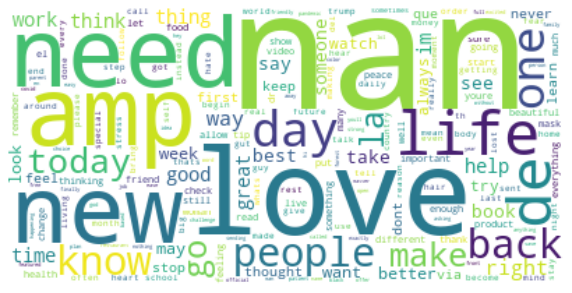

In [96]:
# word cloud
text_wc = " ".join(item for item in clean_Tweet_lemmization)    #clean_
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 2. Text Clustering

In [97]:
tv=TfidfVectorizer() 
tv_transform=tv.fit_transform(clean_Tweet_lemmization)
tv_transform.shape

(757, 2751)

# Determine number of Clusters

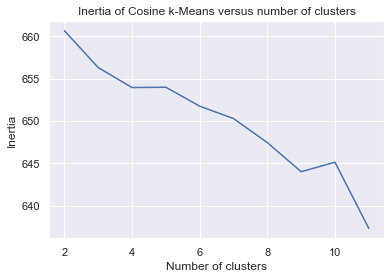

In [99]:
#high dimension data
from sklearn import preprocessing
from sklearn.cluster import KMeans
normalized_vectors = preprocessing.normalize(tv_transform)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

There should be 4 clusters according to the Elbow method

In [69]:
from scipy.cluster.vq import kmeans,vq

In [115]:

num_clusters=4  # change the # of clusters
cluster_centers,distortion=kmeans(tv_transform.todense(),num_clusters)

# Unigram Cluster

In [116]:
tv=TfidfVectorizer(max_features=100)  # 1.change # of features 2.maybe min_df
tv_transform=tv.fit_transform(clean_Tweet_lemmization)

In [117]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:3])

['love', 'amp', 'need']
['nan', 'sure', 'always']
['know', 'dr', 'week']
['want', 'dont', 'work']


In [118]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df
tv_sum.columns = ['importance']

In [119]:
tv_sum.sort_values(ascending=False).head(20)

nan       67.521914
love      18.199660
amp       17.000576
need      16.008069
life      14.772832
today     13.544133
day       13.499857
one       13.184877
like      12.877919
right     12.743743
get       12.357073
know      12.263136
people    12.256638
back      11.508899
help      11.437207
new       11.378895
go        10.966201
make      10.220012
de        10.026855
time       9.287478
dtype: float64

In [120]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

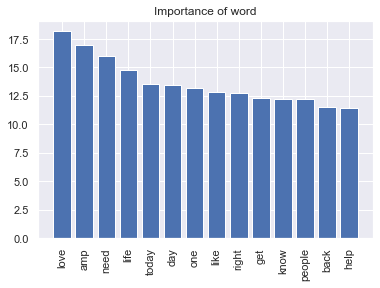

In [128]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.title('Importance of word')
plt.show()

# Bigram Cluster

In [104]:
bi_tv=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
tv_transform=bi_tv.fit_transform(clean_Tweet_lemmization)

In [105]:
terms=bi_tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:3])

['altura de', 'avoid food', 'award winning']
['piece dispelling', 'way always', 'really cute']
['way always', 'youll never', 'altura de']
['rest peace', 'way always', 'wearing mask']


In [106]:
columns=bi_tv.get_feature_names() # feature names
#transform to DF
Tweet=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
binigram_tv_sum=Tweet.sum() #df

In [107]:
binigram_tv_sum.sort_values(ascending=False).head(20)

dont know          3.000000
gt gt              3.000000
let go             3.000000
need stop          2.691010
spend time         2.377115
marketing video    2.000000
brand new          2.000000
power change       2.000000
life make          2.000000
life precious      2.000000
help prevent       2.000000
rest peace         2.000000
en la              2.000000
best thing         2.000000
youll never        2.000000
someone help       2.000000
mind amp           2.000000
take step          2.000000
new york           2.000000
book got           2.000000
dtype: float64

In [122]:
bigram_df=pd.DataFrame(binigram_tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

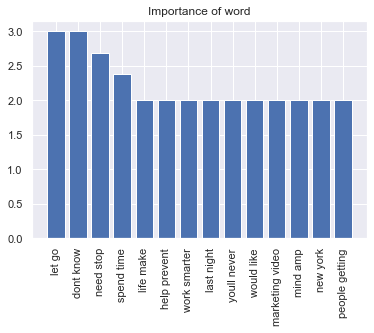

In [127]:
sns.set()
fig,ax=plt.subplots()
ax.bar(bigram_df.index,bigram_df.importance,label='importance')
ax.set_xticklabels(bigram_df.index,rotation=90)
plt.title('Importance of word')
plt.show()

# Unigram & Bigram

In [108]:
tri_tv=TfidfVectorizer(max_features=100,ngram_range=(1,2)) 
tv_transform=tri_tv.fit_transform(clean_Tweet_lemmization)

In [109]:
terms=tri_tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:5])

['always', 'amp', 'around', 'back', 'beautiful']
['product', 'week', 'thank', 'could', 'well']
['week', 'youre', 'always', 'amp', 'around']
['thing', 'week', 'well', 'via', 'want']


In [110]:
columns=tri_tv.get_feature_names() # feature names
#transform to DF
Tweet=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
trigram_tv_sum=Tweet.sum() #df

In [111]:
trigram_tv_sum.sort_values(ascending=False).head(20)

nan       67.521914
love      17.951190
amp       16.397875
need      15.809971
life      14.482799
today     14.064940
day       13.222475
one       13.184877
right     12.743743
get       12.583261
like      12.480768
people    12.357782
know      12.165611
back      11.825999
help      11.515053
go        11.121216
new       10.957869
make      10.224171
de        10.026855
great      9.316476
dtype: float64

In [124]:
trigram_df=pd.DataFrame(trigram_tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

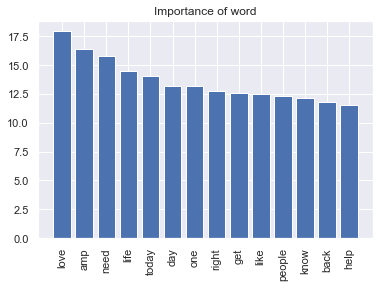

In [126]:
sns.set()
fig,ax=plt.subplots()
ax.bar(trigram_df.index,trigram_df.importance,label='importance')
ax.set_xticklabels(trigram_df.index,rotation=90)
plt.title('Importance of word')
plt.show()